In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("diabetes_data_upload.csv")

# Check the basic structure of the dataset
print("Shape of the dataset:", df.shape)
print("First few rows:")
print(df.head())

# Check if there are any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Encode categorical variables
# Most of the columns are 'object' type, so we will use LabelEncoder
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
        # This will convert strings like 'Yes', 'No' or 'Male', 'Female' to 0 and 1

# Scale the 'Age' column
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

# Print the processed data to check
print("\nProcessed data preview:")
print(df.head())


Shape of the dataset: (520, 17)
First few rows:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     

In [89]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
# Usually we keep 80% for training and 20% for testing
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model using training data
log_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log = log_model.predict(X_test)

# Print evaluation metrics
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



In [91]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model with default neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Print evaluation metrics
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))


KNN Results:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.96      0.90      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104



In [93]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with limited depth to avoid overfitting
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the decision tree
tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_model.predict(X_test)

# Print evaluation metrics
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



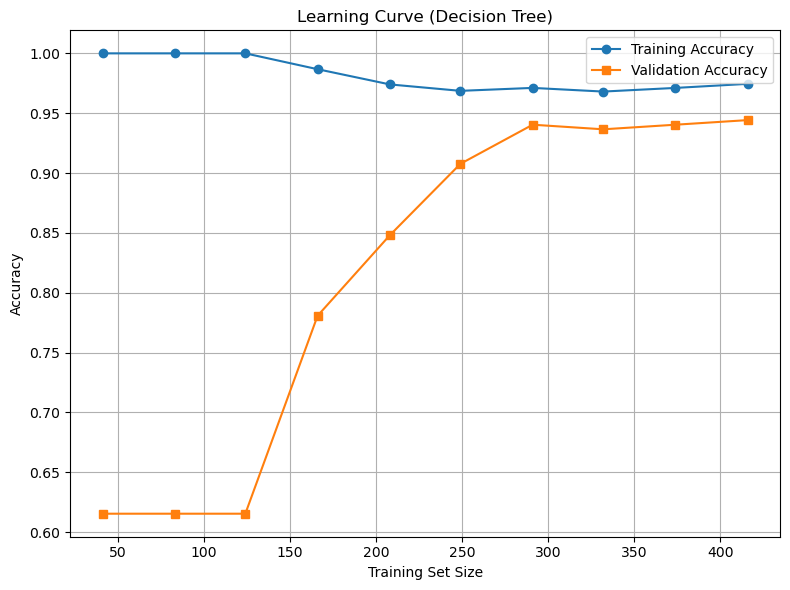

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Reuse the feature and label data
# (X and y already defined in previous step)

# Create a simple decision tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Get training and validation scores using learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree_model,
    X=X,
    y=y,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # test on increasing amounts of training data
    random_state=42
)

# Calculate average scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Print metrics for all models

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("KNN Report:")
print(classification_report(y_test, y_pred_knn))

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

KNN Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.96      0.90      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



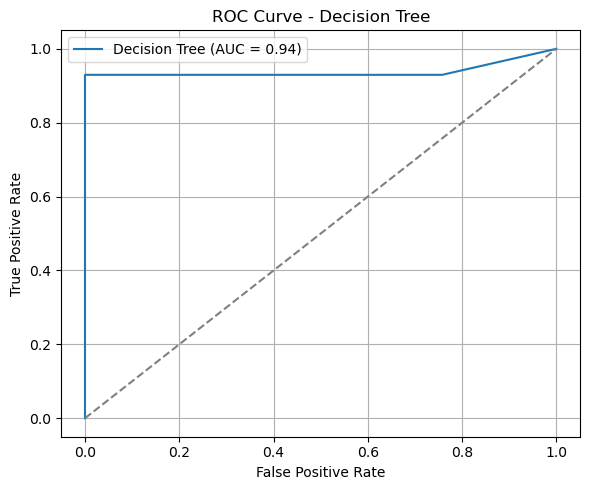

In [107]:
# Create and train the decision tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict class labels
y_pred_tree = tree_model.predict(X_test)

# Print classification report
print("Decision Tree Evaluation:")
print(classification_report(y_test, y_pred_tree))

# Predict probabilities for positive class (for ROC curve)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_tree)
auc_score = roc_auc_score(y_test, y_prob_tree)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
# ----------------------------------------------------------
# Final Model Selection Justification:
# 
# The Decision Tree classifier was selected as the final model
# because it achieved the highest accuracy (0.95) and F1-score (0.96)
# among the three models tested. Although Logistic Regression had a
# slightly higher AUC (0.97), and KNN had strong performance as well,
# the Decision Tree achieved perfect precision (1.00) and performed
# consistently across all metrics. Its tree-based structure also makes
# it more interpretable, which is useful when working with medical data.
# ----------------------------------------------------------